## Section 1: Data Handling

### 1.1 Data Mining

### Loading and Peeking Data

In [6]:
import pandas as pd
df = pd.read_csv('housing.csv')


In [8]:
df.head()  # Display the first few rows of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Understanding Data Types

In [9]:
df.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Basic Statistical Summary

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### Check for Missing Values

In [12]:
df.isnull().sum()  # Check for missing values in each column
df.isnull().sum() / len(df) * 100  # Calculate the percentage of missing values in each column 

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

### Detect Duplicates

In [13]:
# Detect Duplicate Rows
df.duplicated().sum()  # Count the number of duplicate rows in the DataFrame

np.int64(0)

### Check for Outliers

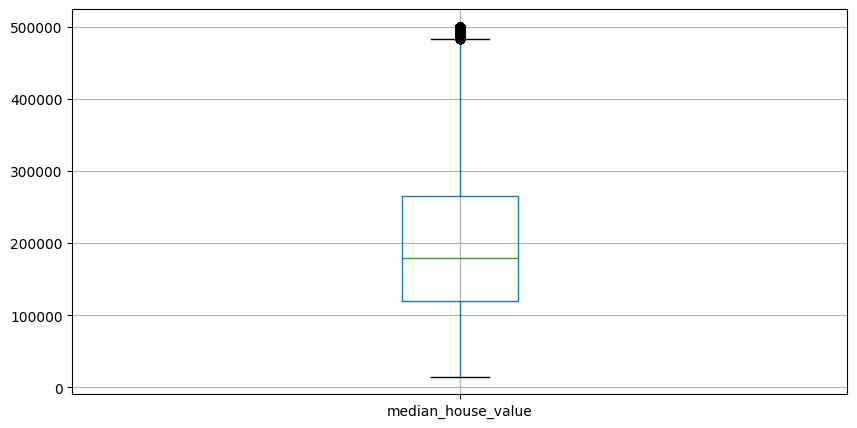

In [15]:
import matplotlib.pyplot as plt

df.boxplot(column='median_house_value', figsize=(10, 5))
plt.show()

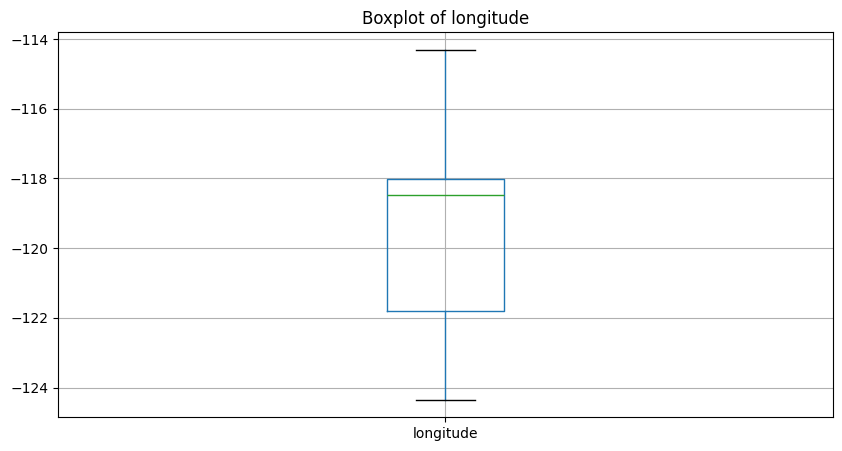

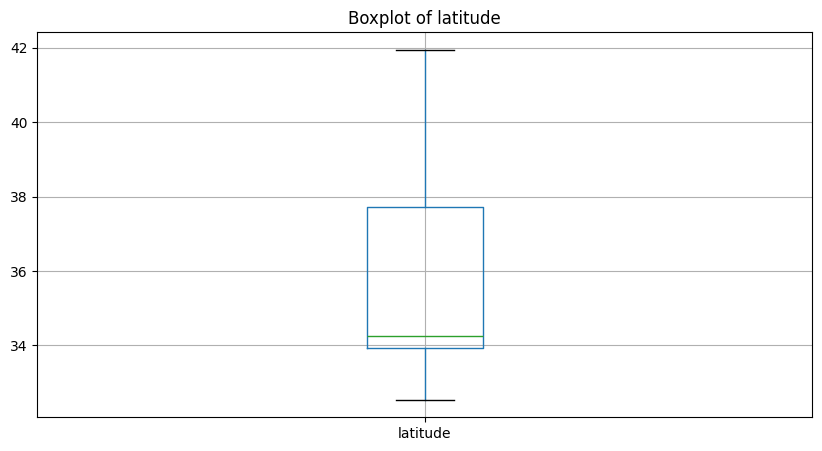

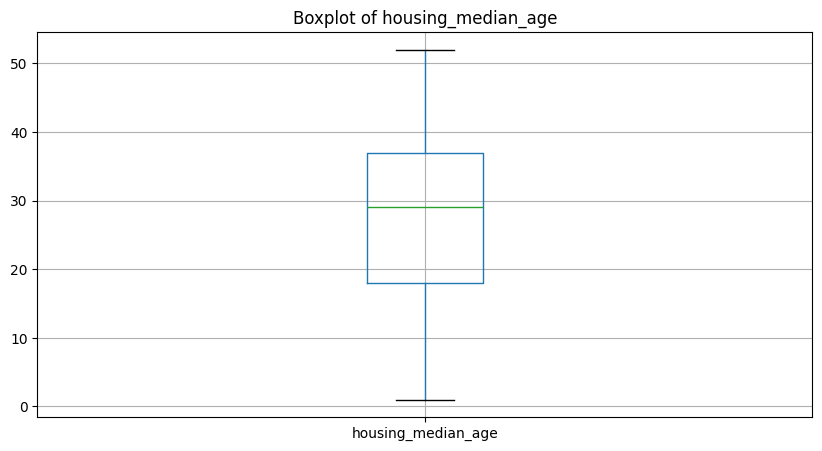

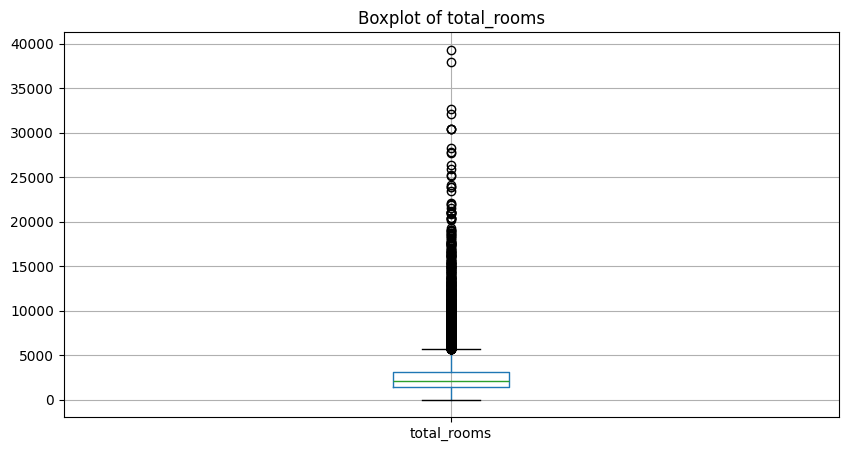

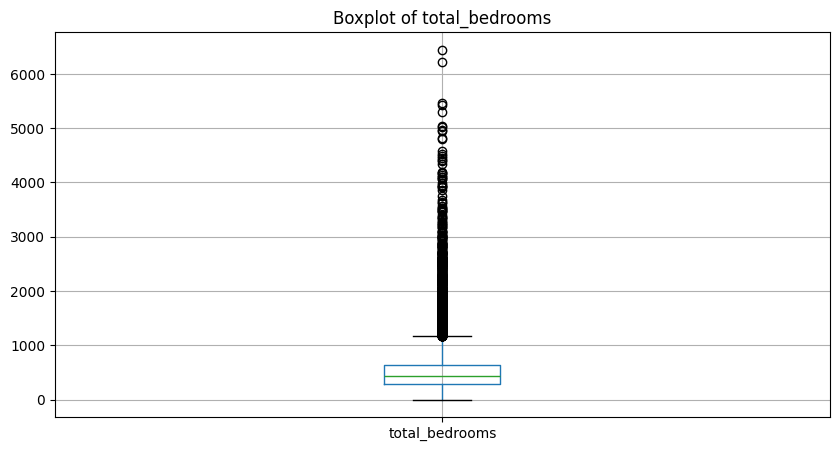

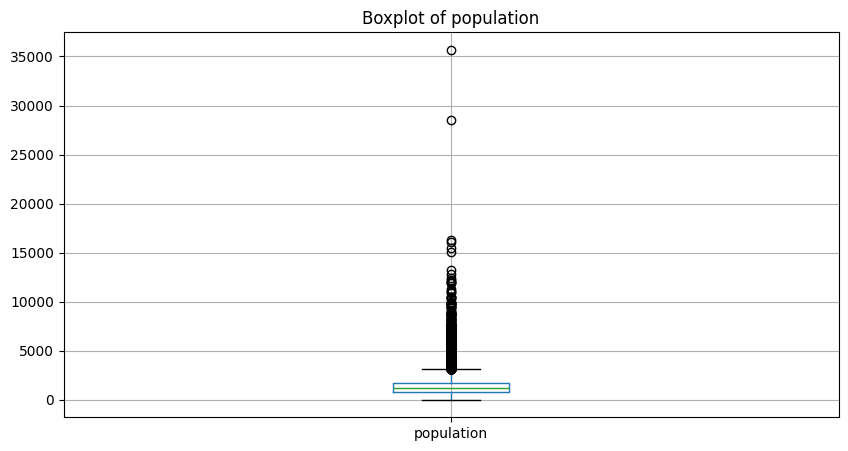

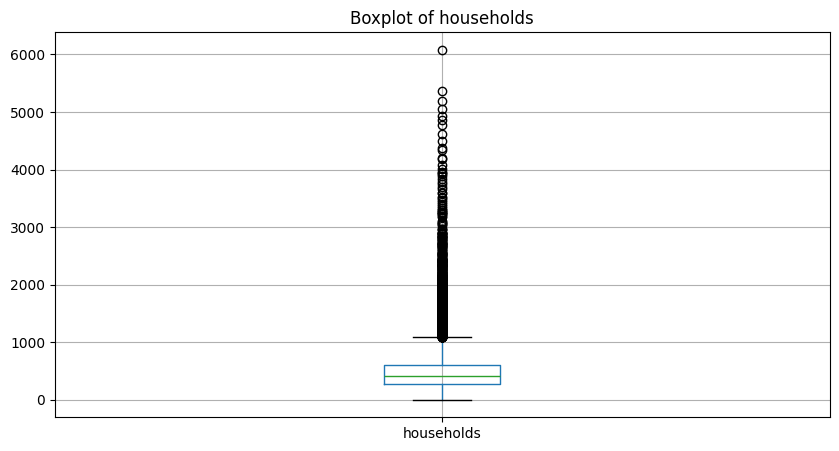

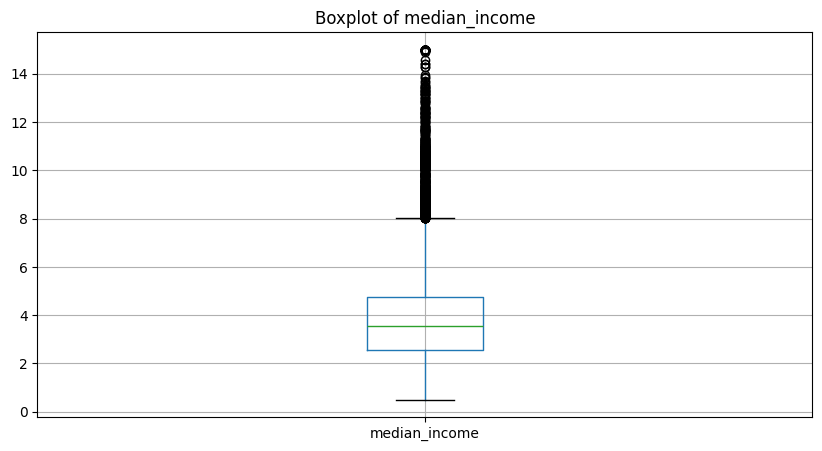

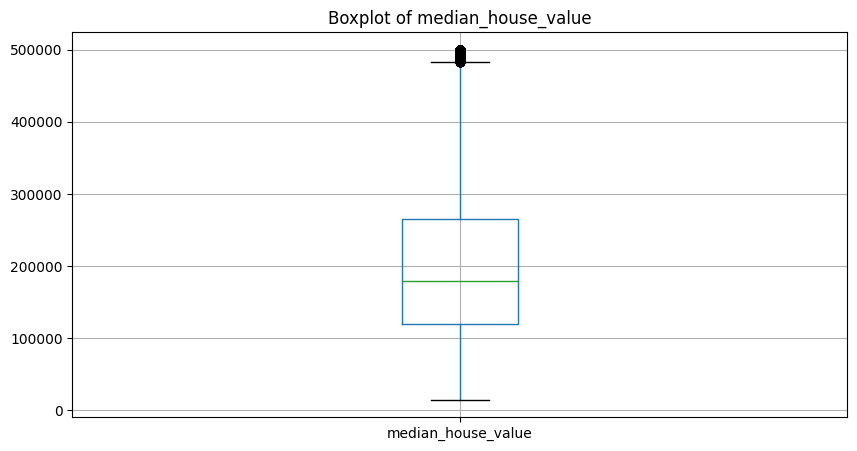

In [16]:
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_col:
    plt.figure(figsize=(10, 5))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### Explore Categorical Columns

In [18]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### EDA Distribution

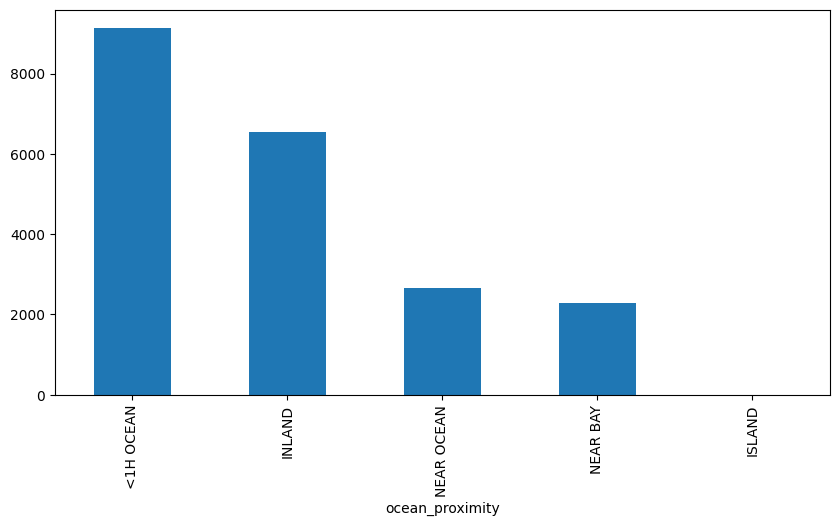

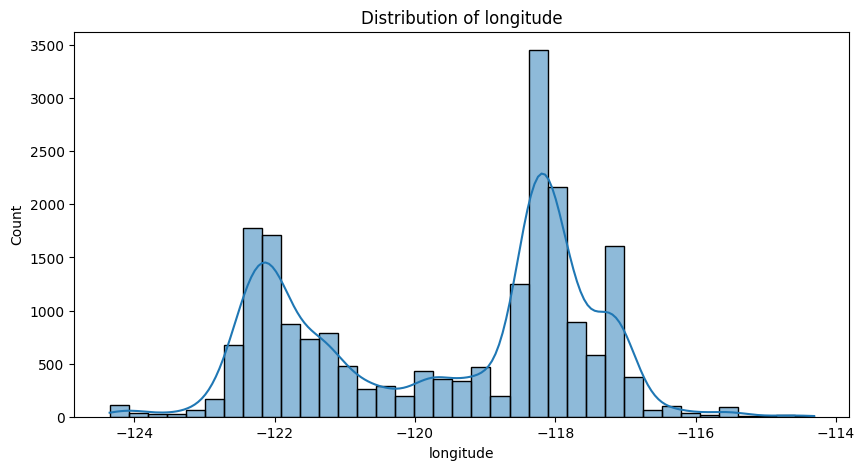

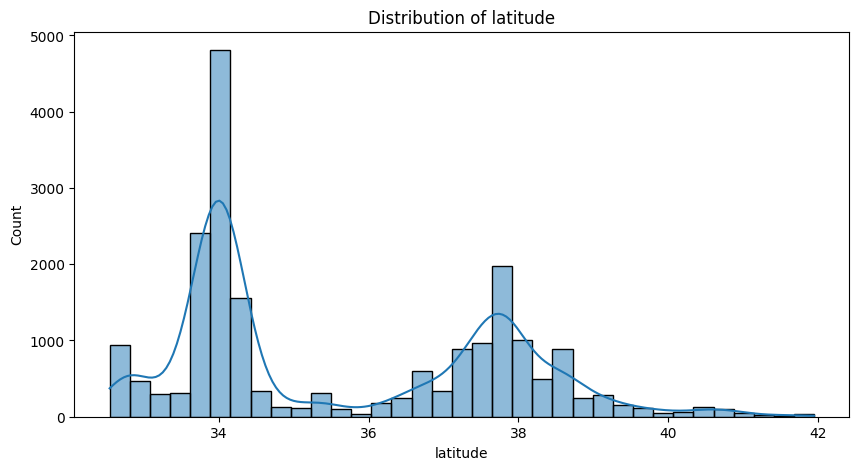

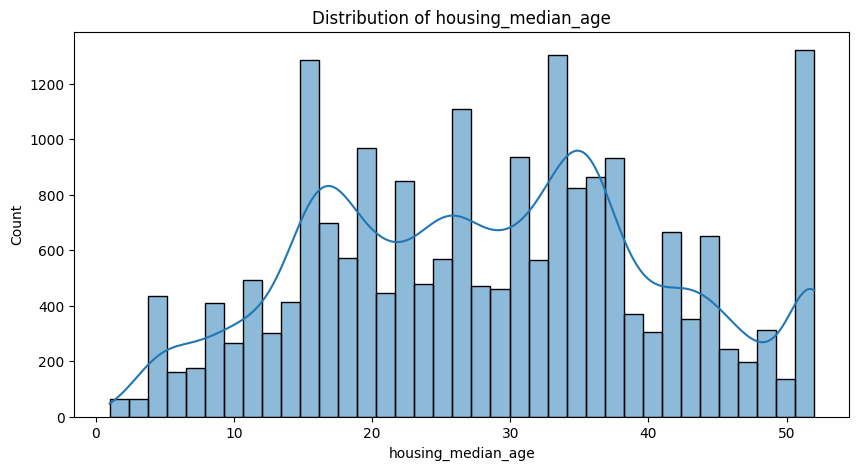

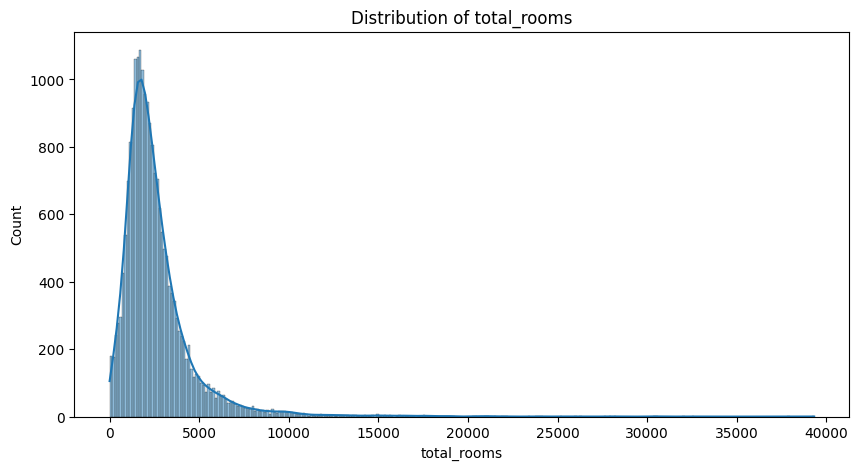

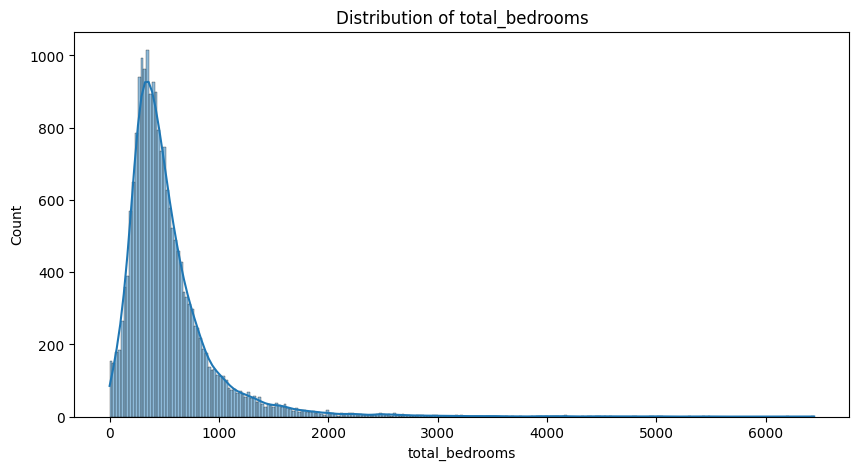

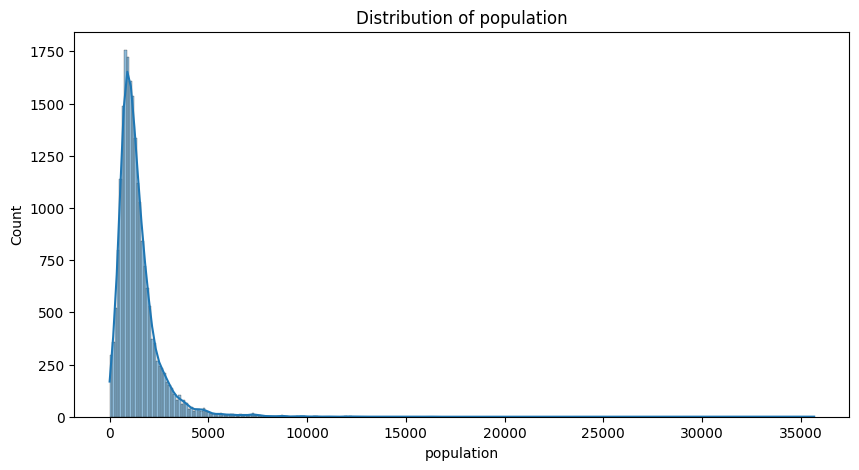

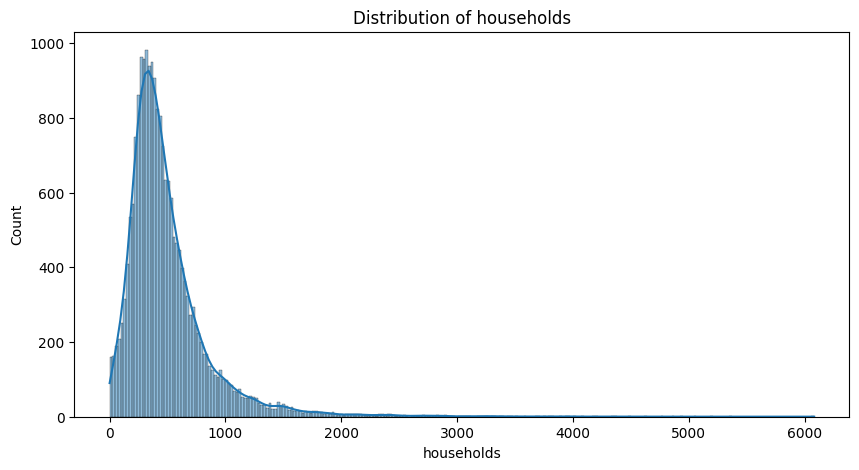

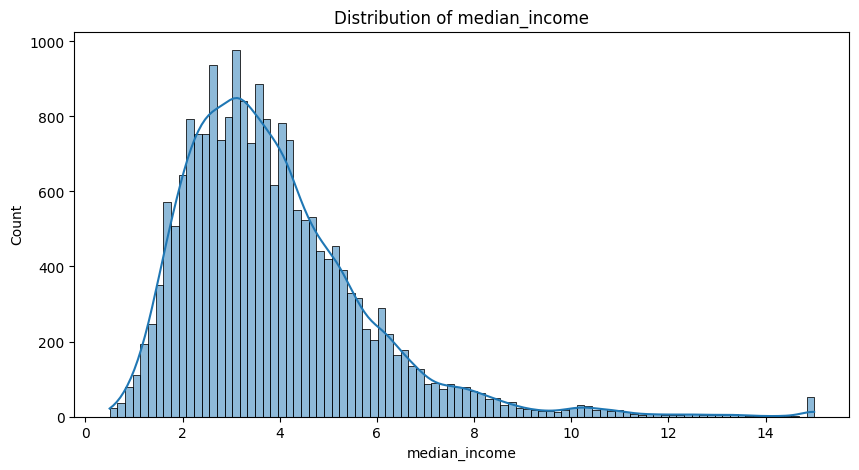

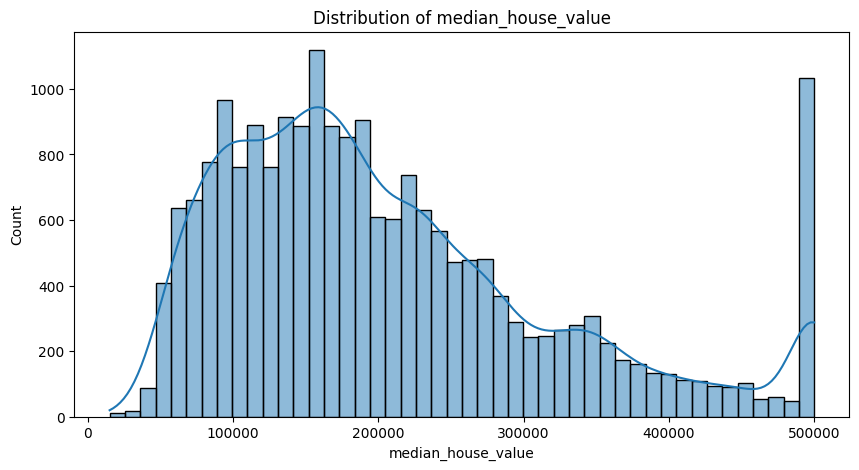

In [19]:
import seaborn as sns

for col in numeric_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Correlation Check

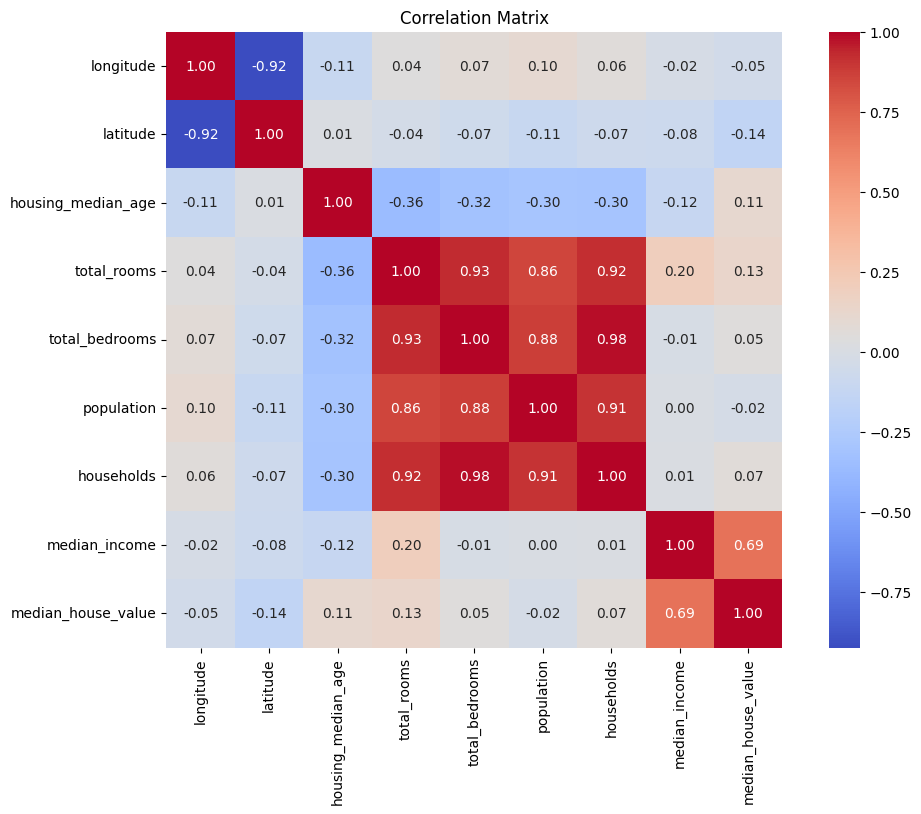

In [22]:
corr_matrix = df[numeric_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Initial Observations

### Initial Data Observations
- **Columns with missing values:**
  - Use `df.isnull().sum()` to check for missing values. Typically, `total_bedrooms` has missing values in the California housing dataset.
- **Columns with skewed distributions:**
  - Use the skewness code and histogram plots. Commonly, `population`, `households`, and `median_house_value` show right (positive) skew.
- **Strange value ranges:**
  - The `.describe()` summary and boxplots help spot unusual ranges. For example, `median_house_value` may be capped at 500001, and zero values in `total_rooms` or `total_bedrooms` may be strange.
- **Suspicious outliers:**
  - Boxplots for each numeric column highlight outliers. Look for extreme values in `population`, `total_rooms`, and `median_house_value`. Outliers may be legitimate but should be investigated.
- **Feature engineering ideas:**
  - `rooms_per_household = total_rooms / households`
  - `bedrooms_per_room = total_bedrooms / total_rooms`
  - `population_per_household = population / households`
  These ratios can capture more meaningful relationships than raw counts.

In [23]:
df.isnull().sum()  # Check for missing values in each column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [24]:
# Calculate skewness for each numeric column
skew_values = df[numeric_col].skew()
print("Skewness of numeric columns:")
print(skew_values)

Skewness of numeric columns:
longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


### 1.2 Data Cleaning

### Missing Values
	total_bedrooms is the only column with missing values.
    We must decide whether to:
	•	Impute (fill with median/mean, etc.).
	•	Flag (create a “missing” indicator).
	•	Drop rows (not recommended unless very few).

In [28]:
# Count missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [27]:
# Fill missing total_bedrooms with median
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)

In [30]:
df["total_bedrooms"]  # Check if there are still missing values in total_bedrooms

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

### Duplicates
	•	Check if there are any repeated rows.
	•	If found, drop them (df.drop_duplicates()).

In [32]:
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")

if duplicates_count > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 0


### Impossible Values

In [33]:
# Check for zeros in columns that shouldn't be zero
cols_to_check = ['total_rooms', 'total_bedrooms', 'households', 'population']

for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Warning: {zero_count} rows have zero in {col} (may be unrealistic)")
        # Optional: Replace zeros with median values
        median_value = df[col].median()
        df.loc[df[col] == 0, col] = median_value

In [34]:
zero_count > 0

np.False_

### Outlier Flagging
	•	Not removing just yet, but flagging anything extreme.
	•	In this dataset:
	•	median_house_value is capped at 500,001 — this isn’t noise, but a dataset limitation.
	•	Some neighborhoods have 10× more rooms or population than average → could distort certain models.

In [35]:
# We'll just print potential outliers for awareness (not removing yet)
for col in ['total_rooms', 'total_bedrooms', 'population', 'median_house_value']:
    high_threshold = df[col].quantile(0.99)  # top 1% as outlier
    high_count = (df[col] > high_threshold).sum()
    print(f"{col}: {high_count} values above 99th percentile ({high_threshold})")

total_rooms: 207 values above 99th percentile (11212.11000000003)
total_bedrooms: 207 values above 99th percentile (2216.270000000004)
population: 207 values above 99th percentile (5805.830000000002)
median_house_value: 0 values above 99th percentile (500001.0)


In [36]:
# Ensure ocean_proximity is categorical
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [37]:
# Latitude/Longitude check
lat_range = (df['latitude'].min(), df['latitude'].max())
lon_range = (df['longitude'].min(), df['longitude'].max())
print(f"\nLatitude range: {lat_range} | Longitude range: {lon_range}")


Latitude range: (np.float64(32.54), np.float64(41.95)) | Longitude range: (np.float64(-124.35), np.float64(-114.31))


In [38]:
# Housing median age check
print(f"Housing median age range: {df['housing_median_age'].min()} - {df['housing_median_age'].max()}")

Housing median age range: 1.0 - 52.0


In [39]:
# Final shape after cleaning
print(f"\nFinal dataset shape: {df.shape}")


Final dataset shape: (20640, 10)


### 1.3 Data Exploration

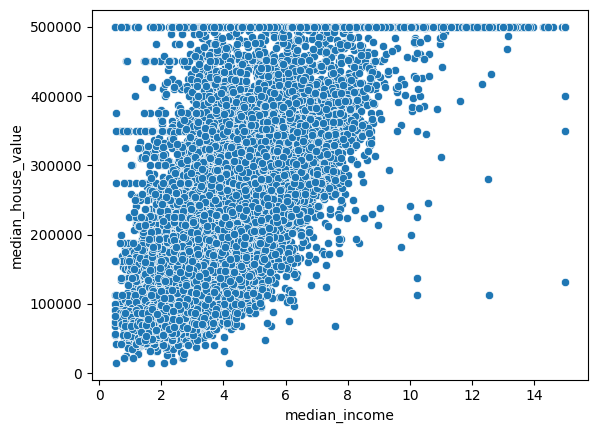

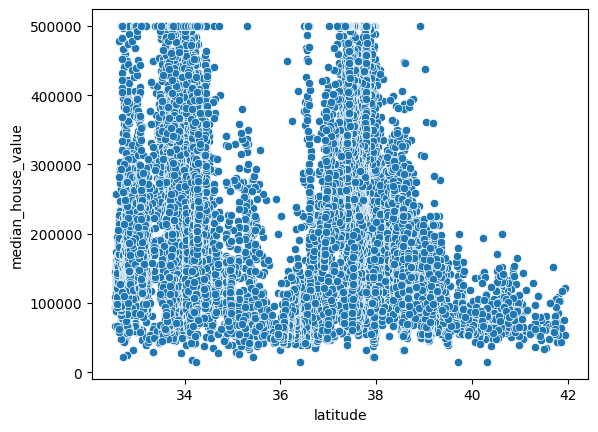

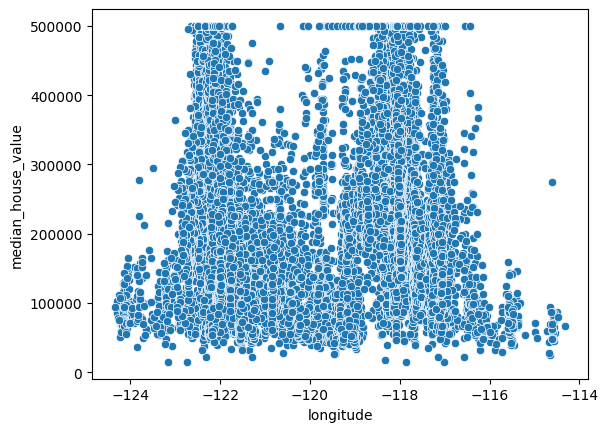

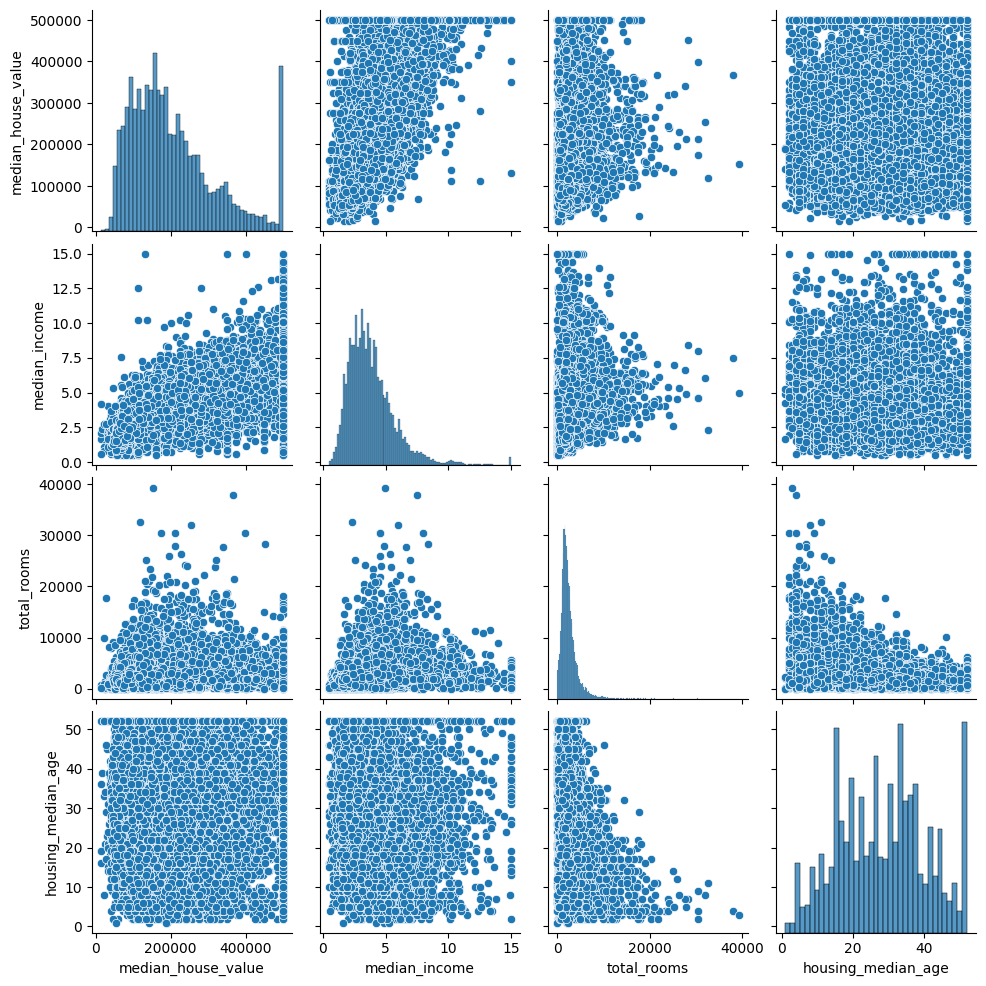

In [40]:
# Scatterplots for strong correlations
sns.scatterplot(data=df, x='median_income', y='median_house_value')
plt.show()

sns.scatterplot(data=df, x='latitude', y='median_house_value')
plt.show()

sns.scatterplot(data=df, x='longitude', y='median_house_value')
plt.show()

# Pairplot for a subset of features
subset = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(df[subset])
plt.show()

### 1.4 Data Transformation

In [41]:
# one-hot encoding for ocean_proximity
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [ ]:
df.head()  # Display the first few rows of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [43]:
# Feature engineering: create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [44]:
df.head()  # Display the first few rows of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467


In [46]:
import numpy as np

# Handling Skewness
for col in numeric_col:
    if df[col].skew() > 1 or df[col].skew() < -1:
        df[col] = np.log1p(df[col])  # Apply log transformation to reduce skewness

In [47]:
df.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
 13  rooms_per_household         206

## Section 2: Data Modeling

### Train/Test Split

In [48]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

(16512, 15) (4128, 15)


### Scaling Features
For tree-based models (RandomForest, GradientBoosting) scaling is not essential.
For Linear Regression it helps to scale numeric features.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation
We’ll use RMSE (Root Mean Squared Error) and R² score for evaluation.

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return rmse, r2

### Train Models

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

results = {}

# Linear Regression
lr = LinearRegression()
results["Linear Regression"] = evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

In [55]:
# Display results
for model_name, (rmse, r2) in results.items():
    print(f"{model_name} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

Linear Regression → RMSE: 77469.29, R²: 0.5420
Random Forest → RMSE: 50272.63, R²: 0.8071
Gradient Boosting → RMSE: 53667.02, R²: 0.7802


### Feature Importance for Tree Models

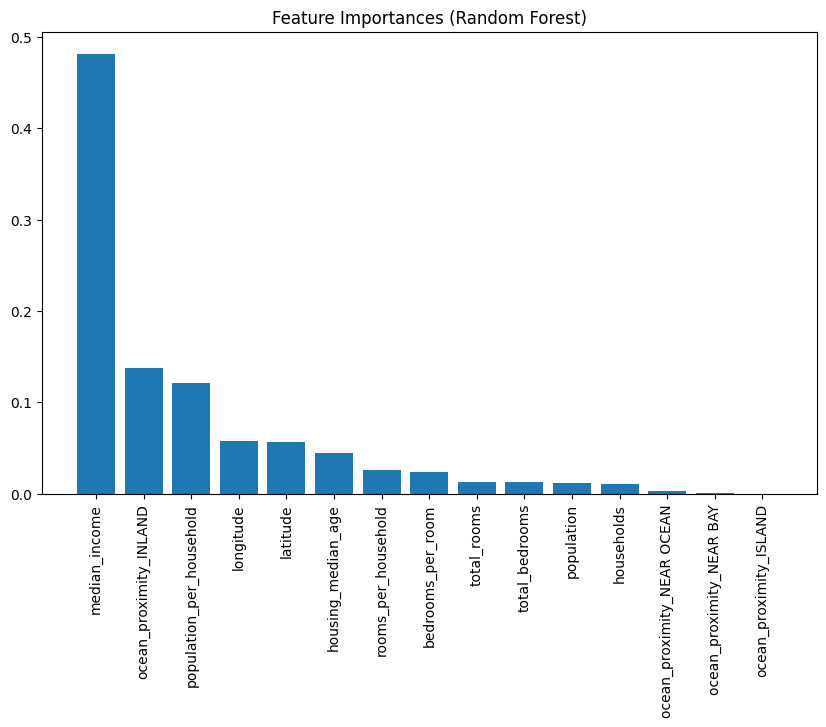

In [56]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

## Hyperparameter Tuning - GridSearchCV
We’ll search for the best combination of parameters for both models and then compare tuned versions with our baseline models.

In [57]:
from sklearn.model_selection import GridSearchCV

# ===============================
# Random Forest Tuning
# ===============================
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)
print("Best RF params:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

# ===============================
# Gradient Boosting Tuning
# ===============================
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gb_params,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

gb_grid.fit(X_train, y_train)
print("Best GB params:", gb_grid.best_params_)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

### Evaluate Tuned Models

In [58]:
# Evaluate tuned models
results["Random Forest (Tuned)"] = evaluate_model(best_rf, X_train, y_train, X_test, y_test)
results["Gradient Boosting (Tuned)"] = evaluate_model(best_gb, X_train, y_train, X_test, y_test)

# Display comparison
print("\nModel Performance Comparison:")
for model_name, (rmse, r2) in results.items():
    print(f"{model_name} → RMSE: {rmse:.2f}, R²: {r2:.4f}")


Model Performance Comparison:
Linear Regression → RMSE: 77469.29, R²: 0.5420
Random Forest → RMSE: 50272.63, R²: 0.8071
Gradient Boosting → RMSE: 53667.02, R²: 0.7802
Random Forest (Tuned) → RMSE: 49633.68, R²: 0.8120
Gradient Boosting (Tuned) → RMSE: 47029.25, R²: 0.8312
